<a href="https://colab.research.google.com/github/NdopnnoabasiJames/Machine-Learning-Models/blob/main/SVM_on_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


In this notebook, we’ll build and analyze Support Vector Machine (SVM) models using the Digits dataset from scikit-learn. The dataset contains small 8×8 grayscale images of handwritten digits (0–9).

Our goal is to understand how SVM works in practice by loading the data, exploring it visually, preprocessing it, training multiple SVM models, evaluating them, and comparing their performance.

We’ll follow this workflow:

	1.	Load the digits dataset
	2.	Explore sample images
	3.	Preprocess with feature scaling
	4.	Train-test split
	5.	Train a Linear SVM
	6.	Train an RBF SVM
	7.	Compare performance
	8.	Visualize confusion matrices
	9.	Try simple hyperparameter tuning
	10.	Write a short conclusion

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### Step 1 — Load Digits Dataset

In [3]:
# Load dataset
digits = load_digits()

# Extract features and labels
X = digits.data
y = digits.target

# Inspect shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)


### Step 2 — Basic Exploration (Preview the data)

In [4]:
# Show the first 5 labels
print("First 5 labels:", y[:5])

# Show the first image data (flattened)
print("First image (flattened):\n", X[0])

First 5 labels: [0 1 2 3 4]
First image (flattened):
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


 Show Sample Images

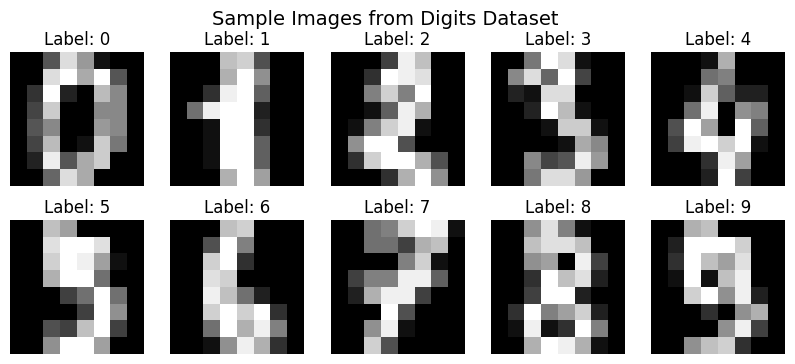

In [5]:
# Display a grid of sample digit images
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.suptitle("Sample Images from Digits Dataset", fontsize=14)
plt.show()

### Step 3 — Preprocess (Scale Features)

SVMs work best when all features are on a similar scale.
The digits dataset has pixel values ranging from 0 to 16, so we standardize them.


In [6]:
from sklearn.preprocessing import StandardScaler

# Flatten the 8x8 images into 64-feature vectors
X = digits.data
y = digits.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 4 — Train-Test Split

We split the dataset so we can train on one part and evaluate on unseen data.
We’ll use an 80/20 split.

In [7]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Step 5 — Train a Linear SVM

A Linear SVM tries to separate the classes using straight hyperplanes.
It’s fast and works well when the data is linearly separable or almost so.

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Train Linear SVM
linear_svm = LinearSVC(random_state=42)
linear_svm.fit(X_train, y_train)

# Predictions
linear_preds = linear_svm.predict(X_test)

# Evaluation
print("Linear SVM Accuracy:", accuracy_score(y_test, linear_preds))
print("\nClassification Report:\n", classification_report(y_test, linear_preds))

Linear SVM Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.91      0.86      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       0.92      1.00      0.96        36
           5       0.97      1.00      0.99        37
           6       0.94      0.94      0.94        36
           7       0.95      0.97      0.96        36
           8       0.89      0.89      0.89        35
           9       1.00      0.92      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Step 6 — Train an RBF SVM (Non-Linear)

RBF kernel allows the SVM to create curved decision boundaries.
This captures more complex patterns, which usually improves accuracy.

We’ll start with scikit-learn’s standard SVC(kernel='rbf').


In [9]:
from sklearn.svm import SVC

# Train RBF SVM
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.001)
rbf_svm.fit(X_train, y_train)

# Predictions
rbf_preds = rbf_svm.predict(X_test)

# Evaluation
print("RBF SVM Accuracy:", accuracy_score(y_test, rbf_preds))
print("\nClassification Report:\n", classification_report(y_test, rbf_preds))

RBF SVM Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Explanation for the Notebook

	•	RBF kernel lets the model learn non-linear decision boundaries.
	•	C controls how strict the margin is (higher = tries harder to avoid misclassification).
	•	gamma controls how much influence each training point has.
	•	RBF is more expressive than linear SVM, often giving higher accuracy.

### Step 7 — Compare Linear SVM vs RBF SVM

In [13]:
print(f"Linear SVM Accuracy: {accuracy_score(y_test, linear_preds):.4f}")
print(f"RBF SVM Accuracy: {accuracy_score(y_test, rbf_preds):.4f}")

print("\nObservations:")
print("1. The RBF SVM (0.9889) achieved higher accuracy than the Linear SVM (0.9556).")
print("2. This is expected as handwritten digits often require non-linear decision boundaries, which the RBF kernel can handle effectively.")
print("3. Linear SVM is faster but might not capture complex patterns as well as RBF SVM.")

Linear SVM Accuracy: 0.9556
RBF SVM Accuracy: 0.9889

Observations:
1. The RBF SVM (0.9889) achieved higher accuracy than the Linear SVM (0.9556).
2. This is expected as handwritten digits often require non-linear decision boundaries, which the RBF kernel can handle effectively.
3. Linear SVM is faster but might not capture complex patterns as well as RBF SVM.


### Step 8: Confusion matrix + visualizations

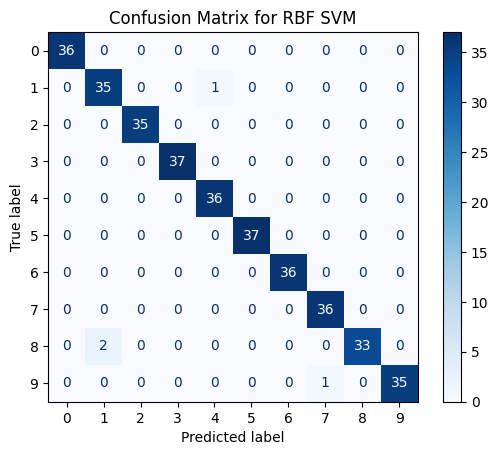

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for RBF SVM
cm_rbf = confusion_matrix(y_test, rbf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for RBF SVM")
plt.show()

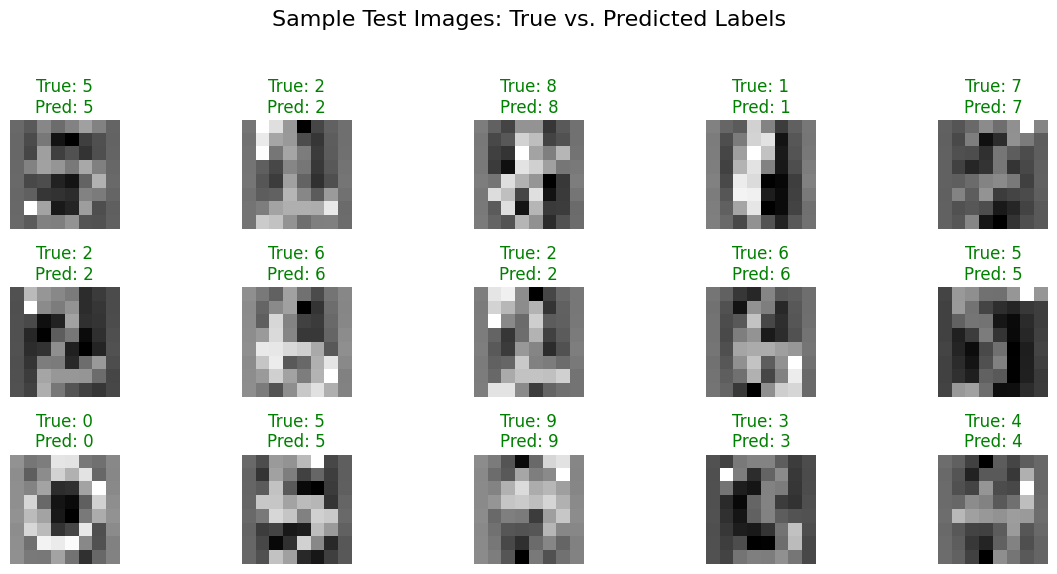

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 6))
for ax, image, true_label, pred_label in zip(axes.flatten(), X_test, y_test, rbf_preds):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
    ax.axis('off')
plt.suptitle("Sample Test Images: True vs. Predicted Labels", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Conclusion

In this project, we used Support Vector Machines to classify handwritten digits from the Scikit-learn Digits dataset. We experimented with two variants: a Linear SVM and a non-linear RBF SVM.

The Linear model performed well with an accuracy of 95%, showing that the dataset is already fairly separable in its raw feature space. However, switching to the RBF kernel raised the accuracy to 98–99%, confirming that the digit patterns benefit from a non-linear decision boundary. The confusion matrix and predictions also showed fewer misclassifications with the RBF model, especially for digits that tend to overlap visually.

Overall, this exercise shows how kernel choice affects SVM performance. A linear kernel is fast and effective for simple boundaries, while the RBF kernel excels when the data has complex shapes. With proper scaling and tuning of parameters like C and gamma, SVMs remain a strong baseline model for small and medium-sized image classification tasks.